## VIDEO EXPLORATION, DATA, FORMAT, ETC



In [6]:
import cv2

# Ruta al video
video_path = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Own_Data_Exploration\Video Exploration\video_20250517_143445.avi"

# Abrir el video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: No se pudo abrir el video. Verifica la ruta.")
else:
    # Obtener ancho y alto
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print(f"Resolución del video: {width}x{height}")
    print(f"FPS del video: {cap.get(cv2.CAP_PROP_FPS)}")
    print(f"Número total de frames: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}")

    # Leer un frame para verificar canales
    ret, frame = cap.read()
    if ret:
        print("Forma del frame (alto, ancho, canales):", frame.shape)
        if len(frame.shape) == 3:
            print(f"El video tiene {frame.shape[2]} canales.")
        else:
            print("El video parece ser monocromático (1 canal).")
    else:
        print("No se pudo leer un frame del video.")

cap.release()


Resolución del video: 2592x2044
FPS del video: 20.0
Número total de frames: 325.0
Forma del frame (alto, ancho, canales): (2044, 2592, 3)
El video tiene 3 canales.


Tras descubrir que los frames del video estan dados por 3 canales, que realmente son 1 banda, unificamos ficha informacion en escala de grises de forma que si tengamos una banda en intensidades.

In [7]:
import cv2
import numpy as np

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if ret:
    # Separar canales
    b, g, r = cv2.split(frame)
    
    # Comparar si son iguales
    print("¿Canal B == Canal G?:", np.array_equal(b, g))
    print("¿Canal B == Canal R?:", np.array_equal(b, r))
    print("¿Canal G == Canal R?:", np.array_equal(g, r))


¿Canal B == Canal G?: False
¿Canal B == Canal R?: False
¿Canal G == Canal R?: False


Como los canales no son  iguales, por lo que vale la pena visualizar cada uno de forma independiente de forma que se puedan ver las diferencias, aunque se espera que sean muy cercanos.

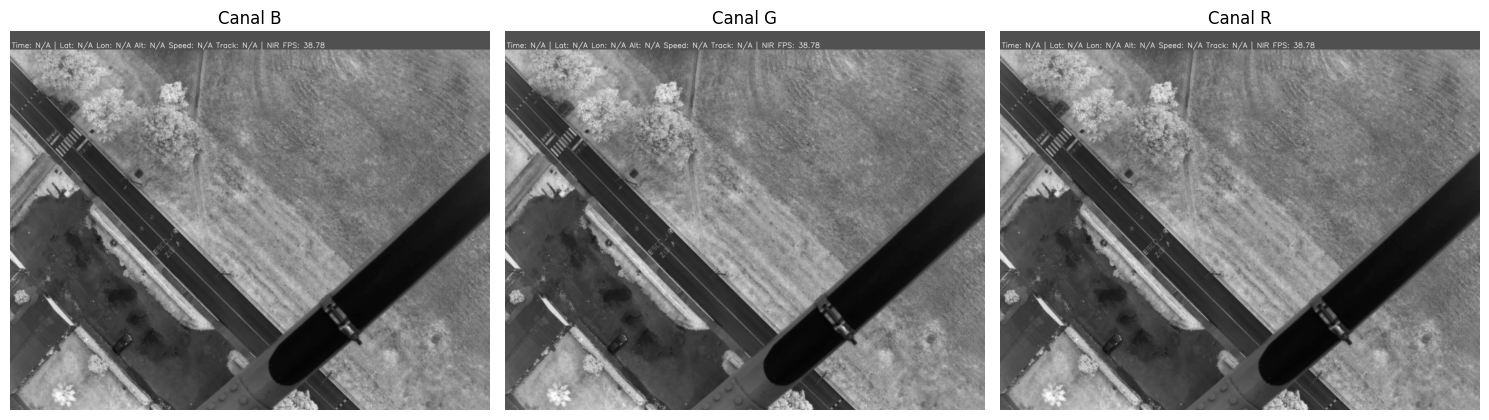

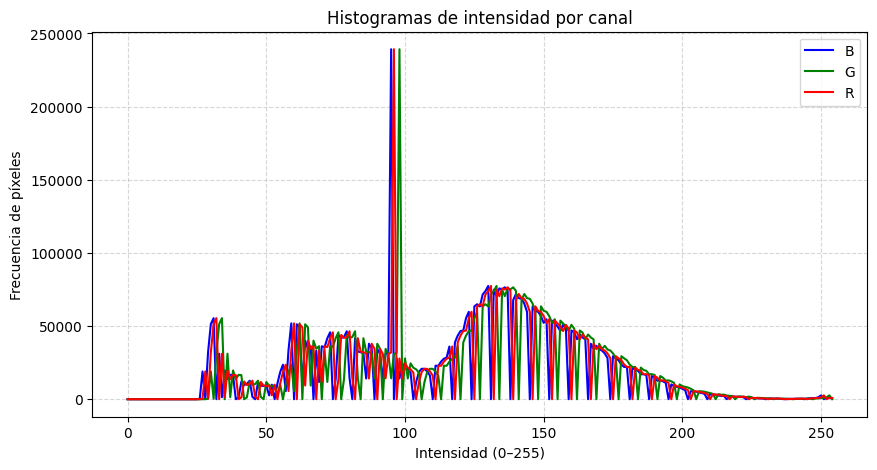

In [9]:
import cv2
import matplotlib.pyplot as plt

# Abrir el video
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ No se pudo leer el frame. Verifica la ruta.")
else:
    # Separar canales B, G, R
    b, g, r = cv2.split(frame)

    # --------- Mostrar canales como imágenes ---------
    plt.figure(figsize=(15,5))

    for i, (channel, title) in enumerate(zip([b,g,r], ["Canal B","Canal G","Canal R"]), 1):
        plt.subplot(1,3,i)
        plt.imshow(channel, cmap="gray")
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # --------- Calcular y mostrar histogramas ---------
    # cv2.calcHist devuelve un histograma con 256 bins (niveles de gris)
    hist_b = cv2.calcHist([b],[0],None,[255],[0,255])
    hist_g = cv2.calcHist([g],[0],None,[255],[0,255])
    hist_r = cv2.calcHist([r],[0],None,[255],[0,255])

    plt.figure(figsize=(10,5))
    plt.plot(hist_b, color="blue", label="B")
    plt.plot(hist_g, color="green", label="G")
    plt.plot(hist_r, color="red", label="R")
    plt.title("Histogramas de intensidad por canal")
    plt.xlabel("Intensidad (0–255)")
    plt.ylabel("Frecuencia de píxeles")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


Tras visualizar el histograma, podemos ver que cada canal contiene la misma informacion simplemente con cierta fase a una mayor intensidad, esto implica que podriamos trabajar con un solo canal de los 3 presentes o aplicar la funcion de OpenCv BGR2GRAY, que multiplica cada color segun sus pesos para ponderarlos en un solo valor, pero como todos nuestros valores son similares, la ponderacion seria al igual que en un modelo de una banda indendiente, por lo que para decidir se compararn los histogramas tras usar la funcion BGR2GRAY y los canales independientes de nuestra camara NIR.

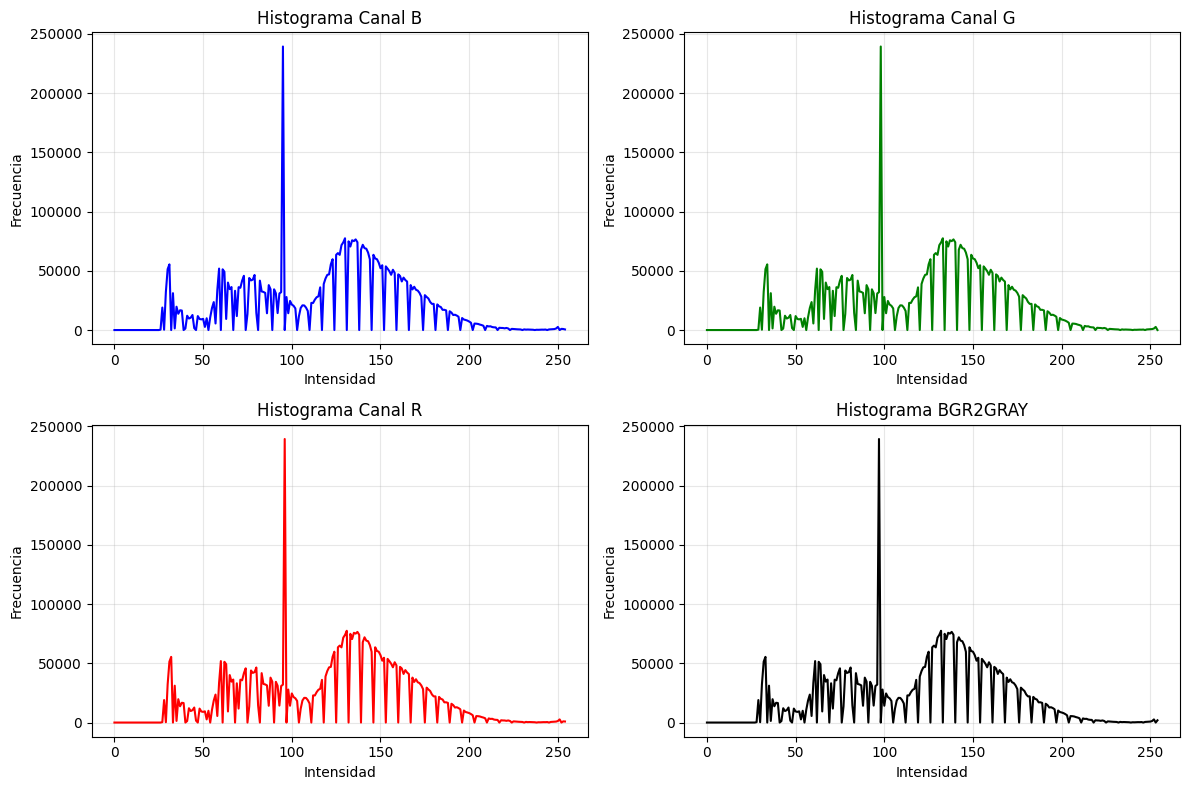

In [16]:
import cv2
import matplotlib.pyplot as plt

# Abrir video y leer un frame
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ No se pudo leer el frame.")
else:
    # Separar canales
    b, g, r = cv2.split(frame)

    # Convertir a escala de grises (BGR2GRAY)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calcular histogramas
    hist_b = cv2.calcHist([b],[0],None,[255],[0,255])
    hist_g = cv2.calcHist([g],[0],None,[255],[0,255])
    hist_r = cv2.calcHist([r],[0],None,[255],[0,255])
    hist_gray = cv2.calcHist([gray],[0],None,[255],[0,255])

    # Graficar histogramas
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.plot(hist_b, color="blue")
    plt.title("Histograma Canal B")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia"); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,2)
    plt.plot(hist_g, color="green")
    plt.title("Histograma Canal G")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia"); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,3)
    plt.plot(hist_r, color="red")
    plt.title("Histograma Canal R")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia"); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,4)
    plt.plot(hist_gray, color="black")
    plt.title("Histograma BGR2GRAY")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia"); plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np

valores, frecuencias = np.unique(b, return_counts=True)
for valor, frecuencia in zip(valores, frecuencias):
    print(f"Valor: {valor}, Frecuencia: {frecuencia}")

Valor: 22, Frecuencia: 6
Valor: 23, Frecuencia: 6
Valor: 24, Frecuencia: 21
Valor: 26, Frecuencia: 341
Valor: 27, Frecuencia: 18976
Valor: 28, Frecuencia: 271
Valor: 29, Frecuencia: 32174
Valor: 30, Frecuencia: 51403
Valor: 31, Frecuencia: 55421
Valor: 33, Frecuencia: 31103
Valor: 34, Frecuencia: 1364
Valor: 35, Frecuencia: 19685
Valor: 36, Frecuencia: 13737
Valor: 37, Frecuencia: 16678
Valor: 38, Frecuencia: 16468
Valor: 40, Frecuencia: 1258
Valor: 41, Frecuencia: 12079
Valor: 42, Frecuencia: 9712
Valor: 43, Frecuencia: 10434
Valor: 44, Frecuencia: 12687
Valor: 45, Frecuencia: 1611
Valor: 47, Frecuencia: 11781
Valor: 48, Frecuencia: 9330
Valor: 49, Frecuencia: 8988
Valor: 50, Frecuencia: 9463
Valor: 51, Frecuencia: 2639
Valor: 52, Frecuencia: 9951
Valor: 54, Frecuencia: 10752
Valor: 55, Frecuencia: 18570
Valor: 56, Frecuencia: 23599
Valor: 57, Frecuencia: 5536
Valor: 58, Frecuencia: 33576
Valor: 59, Frecuencia: 51855
Valor: 61, Frecuencia: 51244
Valor: 62, Frecuencia: 49184
Valor: 63,

: 

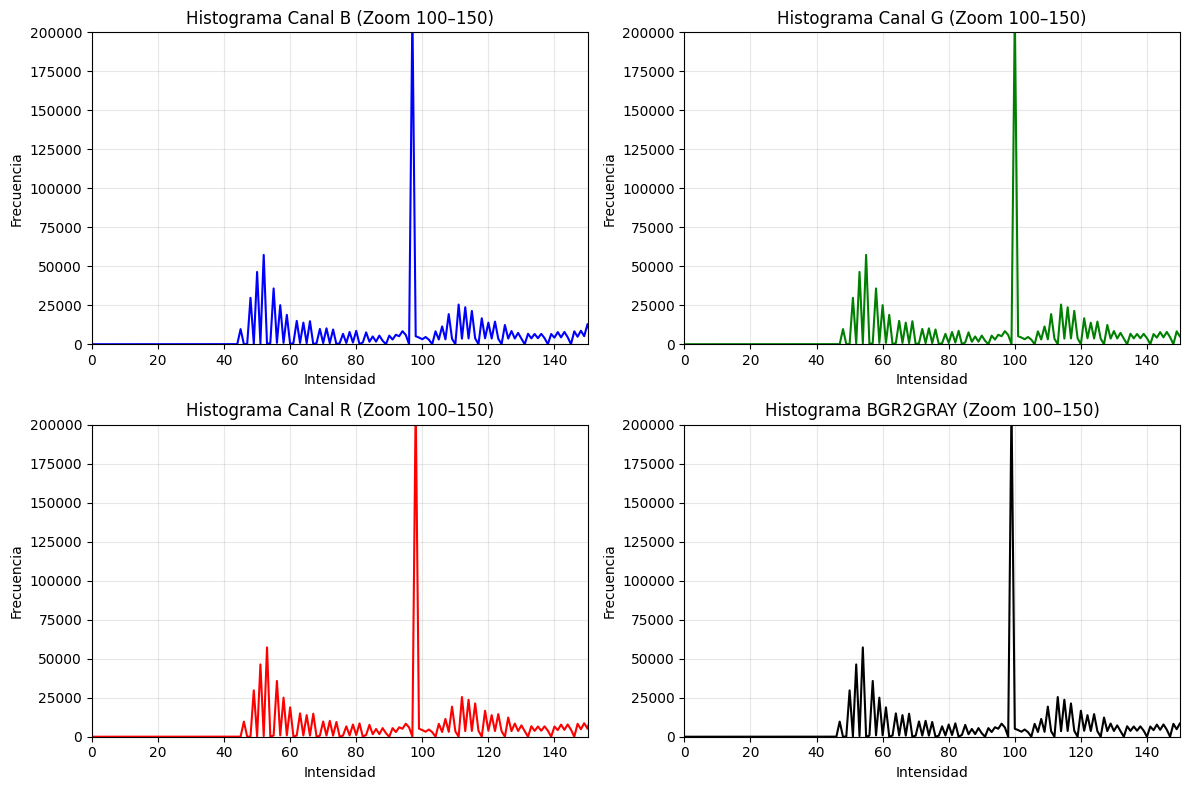

In [63]:
import cv2
import matplotlib.pyplot as plt

# Ruta al video
video_path = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Own_Data_Exploration\video_20250517_143445.avi"

# Abrir video y leer un frame
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ No se pudo leer el frame.")
else:
    # Separar canales
    b, g, r = cv2.split(frame)

    # Convertir a escala de grises (BGR2GRAY)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calcular histogramas
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    hist_gray = cv2.calcHist([gray],[0],None,[256],[0,256])

    # Graficar histogramas con zoom en 100–150
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.ylim(0,200000)
    plt.plot(hist_b, color="blue")
    plt.title("Histograma Canal B (Zoom 100–150)")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia")
    plt.xlim(0,150); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,2)
    plt.ylim(0,200000)
    plt.plot(hist_g, color="green")
    plt.title("Histograma Canal G (Zoom 100–150)")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia")
    plt.xlim(0,150); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,3)
    plt.ylim(0,200000)
    plt.plot(hist_r, color="red")
    plt.title("Histograma Canal R (Zoom 100–150)")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia")
    plt.xlim(0,150); plt.grid(True, alpha=0.3)

    plt.subplot(2,2,4)
    plt.ylim(0,200000)
    plt.plot(hist_gray, color="black")
    plt.title("Histograma BGR2GRAY (Zoom 100–150)")
    plt.xlabel("Intensidad"); plt.ylabel("Frecuencia")
    plt.xlim(0,150); plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


Tras visualizar los historgamas de la informacion contenida en cada frame obtenido de la camara NIR, se establecera que para cada frame de video se trasnformara a 1 canal utilizando bgr2gray por facilidad.

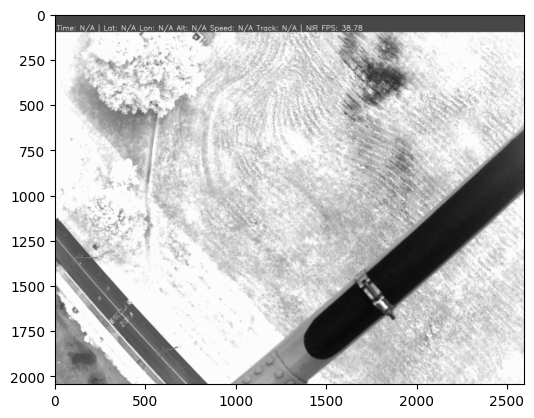

In [54]:
import matplotlib.pyplot as plt
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame_gray, cmap="gray")


Ahora bien, se hara un codigo que, busque visualizar un frame especifico del frame, para luego decidir si tiene informacion importante como para guardarlo para su posterior etiquetado.
 - Primero se buscara quitar la barra gris en la parte superior


Las opciones de las cuales se dispone para lograr lo anterior son:
- Mascara negra en toda la parte superior
- Recortar a las dimensiones originales de la imagen

*Se seleccioanra la segunda asumiento que el "overlay" que observamos en la imagen es agregado y no original de la camara, por lo que una resolucion nativa seria mejor para un posterior deployment del modelo.*

In [67]:
import cv2
import os

# Ruta al video
video_path = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\Own_Data_Exploration\video_20250517_143445.avi"

# Carpeta donde guardar frames
output_dir = "frames_guardados"
os.makedirs(output_dir, exist_ok=True)

# Abrir video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("❌ No se pudo abrir el video")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"El video tiene {total_frames} frames en total.")

    current_frame = 0

    while True:
        # Ir al frame actual
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            print("⚠️ No se pudo leer más frames.")
            break

        # ---------- Redimensionar SOLO para visualización ----------
        h, w = frame.shape[:2]
        max_width = 900   # ancho máximo para mostrar
        scale = max_width / w
        new_w, new_h = int(w * scale), int(h * scale)
        frame_resized = cv2.resize(frame, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # Poner texto con índice del frame
        cv2.putText(frame_resized, f"Frame {current_frame+1}/{total_frames}",
                    (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

        # Mostrar frame
        cv2.imshow("Video", frame_resized)
        print(f"Mostrando frame {current_frame+1}/{total_frames}")

        # Esperar tecla
        key = cv2.waitKey(0) & 0xFF

        if key == ord("q"):  # salir
            break
        elif key == ord("s"):  # guardar frame original sin redimensionar
            save_path = os.path.join(output_dir, f"frame_{current_frame:05d}.png")
            cv2.imwrite(save_path, frame)
            print(f"✅ Guardado en {save_path}")
        elif key == ord("d"):  # siguiente frame
            current_frame = min(current_frame + 1, total_frames - 1)
        elif key == ord("a"):  # frame anterior
            current_frame = max(current_frame - 1, 0)

    cap.release()
    cv2.destroyAllWindows()


El video tiene 325 frames en total.
Mostrando frame 1/325
Mostrando frame 2/325
Mostrando frame 3/325
Mostrando frame 4/325
Mostrando frame 5/325
Mostrando frame 6/325
Mostrando frame 7/325
Mostrando frame 8/325
Mostrando frame 9/325
Mostrando frame 10/325
Mostrando frame 11/325
Mostrando frame 12/325
Mostrando frame 13/325
Mostrando frame 14/325
Mostrando frame 15/325
Mostrando frame 16/325
Mostrando frame 17/325
Mostrando frame 18/325
Mostrando frame 19/325
Mostrando frame 18/325
Mostrando frame 17/325
Mostrando frame 16/325
Mostrando frame 15/325
Mostrando frame 14/325
Mostrando frame 13/325
Mostrando frame 12/325
Mostrando frame 11/325
Mostrando frame 10/325
Mostrando frame 9/325
Mostrando frame 8/325
Mostrando frame 7/325
Mostrando frame 6/325
Mostrando frame 5/325
Mostrando frame 4/325
Mostrando frame 3/325
Mostrando frame 2/325
Mostrando frame 1/325
Mostrando frame 1/325
Mostrando frame 2/325
Mostrando frame 3/325
Mostrando frame 4/325
Mostrando frame 5/325
Mostrando frame 6/325